## 1 - Imports and methods

In [1]:
# import required packages

import pandas as pd
import numpy as np
import re
import global_options
from pathlib import Path
from cleantext import clean # install via: pip install clean-text

#import the word-lists
expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['blockchain'].dropna())]

In [2]:
# required methods

def get_ngrams(s, n):
    '''
    tokenize an input text 
    source: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    '''
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def cleaner(txt):    
    '''
    Clean the input text
    '''
    return clean(
        txt,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,                # replace all numbers with a special token
        no_digits=True,                 # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
        )

def score_calculator(text):
    '''
    return the biodiversity scores for an input text
    '''
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        freq=sum(counts) 
        diversity = len([x for x in counts if x!=0])    
        return diversity/len(wordlist)
    except Exception as ex:
        print(ex)
        return 0


## 2 - Score calculation

In [3]:
# An example
# text from copy paste of the https://www.ft.com/content/1bb8413e-b974-4e05-933e-7ffedec62bdb

text=''' Bitcoin rally pushes BlackRock ETF over $10bn in record time BlackRock’s bitcoin exchange-traded funded has reached $10bn faster than any US ETF in history, fuelled by a rally that continues to send the world’s largest cryptocurrency to record heights. BlackRock’s iShares Bitcoin Trust (IBIT) needed less than two months from its January 11 launch to reach that landmark, beating Invesco QQQ’s record of just over a year, according to Morningstar. IBIT’s total assets now sit at around $12.7bn, a combination of bitcoin’s appreciation and more than $7bn in net inflows. IBIT and the other nine spot bitcoin ETFs to which the Securities and Exchange Commission gave the green light on January 11 have been buoyed by a rally that sent the price of bitcoin over $70,000 on Friday, setting a new high before settling around $68,500 as of Friday afternoon. The 10 spot bitcoin ETFs earned net inflows of about $7bn combined from their mid-January launch through the end of February, including $8.5bn that investors have withdrawn from the $27.5bn Grayscale Bitcoin Trust ETF (GBTC), according to data from Morningstar Direct. The Fidelity Wise Origin Bitcoin ETF has amassed about $7.6bn in assets, putting it in position to be the second-fastest to reach $10bn after its iShares peer. Much of the recent investments in the bitcoin ETFs appear to be from investors who were “trapped inside GBTC” and have exited the priciest bitcoin ETF in favour of a less costly alternative, said Dave Nadig, a longtime ETF observer who has been studying bitcoin ETF trading patterns. Much of the large trading volumes in bitcoin ETFs in recent weeks has been a result of high-frequency traders, Nadig said. “It’s just algo players trying to scalp pennies.” While high-frequency traders and hedge funds have become increasingly interested in bitcoin ETFs and the potential for arbitrage, the bulk of new assets moving BlackRock’s new cryptocurrency products appear to be from retail investors. “The buyers of these things are primarily individual investors looking to access crypto through their tax-advantaged retirement accounts and brokerage accounts,” said Zach Pandl, Grayscale’s director of research. GBTC had a head start on bitcoin ETF assets since it launched over a decade ago, in a structure that made it difficult for investors to exit easily. But investors have been leaving the fund and its 1.5 per cent management fee now that they can more efficiently transfer their holdings to lower-cost alternatives, some of which have waived their fees entirely. “We’re incredibly proud of GBTC and what it has meant for the industry, and we intend to make it a competitive product over time,” Pandl said. The rally following the SEC’s long-awaited spot bitcoin ETF approval has been so positive that the net assets in Grayscale’s ETF have nearly recovered since its conversion, which allowed long-term holders to exit and take profits from bitcoin’s massive rise over the past decade. Recent launches from JPMorgan and State Street Global Advisors have all reached the $10bn threshold in about two years, according to Morningstar. State Street’s SPDR Gold Shares ETF (GLD), which launched in late 2004, was also relatively quick to hit $10bn, clearing that mark in early 2007. “I had high expectations, and this vastly surpassed them,” said James Seyffart, a research analyst with Bloomberg Intelligence. “Demand is being pulled forward much quicker.” Seyffart said bitcoin had become more secure since the January ETF launches. “The probability that this goes to zero is way less, particularly after the SEC approving these ETFs, which takes away some of the downside risk,” he said. Bitcoin ETFs from iShares, Fidelity and Cathie Wood’s Ark Investment Management have taken in the most new cash since their launch, while similar products from Wisdom Tree, Valkyrie and Franklin Templeton have fared less well, according to data from Morningstar Direct. Though WisdomTree’s $58mn bitcoin ETF has not had as much luck gathering assets as most of its peers, “it’s actually been one of our more successful ETF launches, even though we’re not taking in an iShares level of volume”, said Will Peck, WisdomTree’s head of digital assets. “It helps that bitcoin’s gone on a tear since these have launched,” Peck said. “I was expecting it to be kind of a ‘buy the rumour, sell the news’ sort of situation, but it shows how hard it is to know anything with this asset class.” '''


In [4]:
score = score_calculator(text)
print('''Blockchain Score: {0} '''.format(np.round(score, 3)))

Blockchain Score: 0.029 


## 3 - Wordcloud

In [5]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud # install via: pip install wordcloud
from IPython.display import Image


expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['blockchain'].dropna())]

# definitaions
def word_cloud(text):
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        dic=dict(zip(wordlist, counts))
       
    except Exception as ex:
        print(ex)
        dic={' ':1}

    mydictionary = {}
    mydictionary.update(dic)
    
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(mydictionary)
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

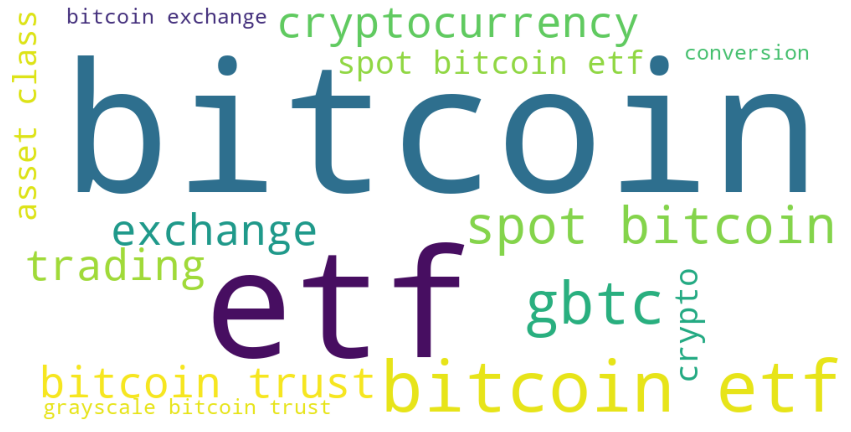

In [6]:
word_cloud(text)